# 范数与空间距离

在本文中，我们探讨一下数学中的范数，空间距离的定义及其在机器学习中的应用。

## 1. 范数
---
在数学上，范数包括: **_向量范数_** 和 **_矩阵范数_**，向量范数表征向量空间中向量的大小，矩阵范数表示征矩阵引起变化的大小。一种非严密的解释就是，对应向量范数，向量空间中的向量都是有大小的，这个大小如何度量，就是用范数来度量的，不同类型的范数都可以来度量这个范数的大小，就好比在长度测量中用不同的单位，米和尺都可以来度量长度一样；对于矩阵范数，学过线性代数，我们知道，通过运算AX=B，可以将通过向量X将A变化为B，矩阵范数就是来度量这个变化大小的。

范数也可以被认为是一种强化了的距离概念，它在定义上比距离多了一条数乘的运算法则。有时候为了便于理解，我们可以把范数当作距离来理解。

### 向量范数定义：向量的范数是一个函数 ||x||, 满足下面3个特性
---
1. **_非负性_** 
```
  ||x||   >=  0
```
2. **_齐次性_** 
```
  ||cx||  =   |c|||x|| 
```
3. **_三角不等式_**   
```
  ||x+y|| <=  ||x|| + ||y||
```

### 常用的向量范数：
---
下面我们给出向量范数定义并且通过计算向量 X=[1, -2, 3, -4, 5, 6, -7, 8, 9] 的范数来进行说明。 

1. **L1范数**:  ||x||=45 为x向量各个元素绝对值之和。 
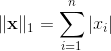

2. **L2范数**:  ||x||=16.88 为x向量各个元素平方和的1/2次方，L2范数又称Euclidean范数或者Frobenius范数
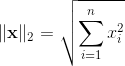

3. **Lp范数**:  ||x|| 为x向量各个元素绝对值p次方和的1/p次方, 不是一个范数，而是一组范数，其定义如下:
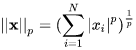

    根据p的变化，范数也有着不同的变化，一个经典的有关P范数的变化图如下：
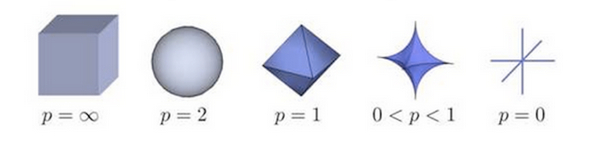

4. **L∞范数**: 
   - ||x||=9 为x向量各个元素绝对值最大那个元素的绝对值，如下：

   - ||x||=1 为x向量各个元素绝对值最小那个元素的绝对值，如下：


5. **椭球向量范数**: ||x||A  = sqrt[T(x)Ax]， T(x)代表x的转置。定义矩阵C 为M个模式向量的协方差矩阵， 设C’是其逆矩阵，则Mahalanobis距离定义为||x||C’  = sqrt[T(x)C’x], 这是一个关于C’的椭球向量范数。

L1范数和L2范数，用于机器学习的L1正则化、L2正则化。对于线性回归模型，使用L1正则化的模型建叫做Lasso回归，使用L2正则化的模型叫做Ridge回归（岭回归）。

L1正则化是指权值向量w中各个元素的绝对值之和，可以产生稀疏权值矩阵（稀疏矩阵指的是很多元素为0，只有少数元素是非零值的矩阵，即得到的线性回归模型的大部分系数都是0. ），即产生一个稀疏模型，可以用于特征选择；

L2正则化是指权值向量w中各个元素的平方和然后再求平方根，可以防止模型过拟合（overfitting）；一定程度上，L1也可以防止过拟合。
至于为什么L1正则化能增加稀疏性，L2正则化能防止过拟合，原理可查看参考资料。

**参考资料**：
  - http://blog.csdn.net/v_july_v/article/details/8203674
  - http://blog.csdn.net/jinping_shi/article/details/52433975
  - https://blog.csdn.net/skybirdhua1989/article/details/17584797


### 常用的矩阵范数：
---

- 1-范数：列和范数，即所有矩阵列向量绝对值之和的最大值。
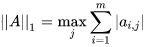


```
a=[1 2 3;
   4 5 6;
   7 8 9]

a =
    1     2     3

    4     5     6

    7     8     9

# 求列和范数
norm(a,1)

ans = 18

# 验证
>> sum(abs(a))

ans =

   12    15    18

>> max(ans)

ans = 18
```

- 2-范数：谱范数，即A'A矩阵的最大特征值的开平方。
 

```
# 求谱范数
>> norm(a,2) 

ans =

  16.8481

# 验证
[V S]=eig(a'*a)

V =

  -0.4082   -0.7767    0.4797

   0.8165   -0.0757    0.5724

  -0.4082    0.6253    0.6651

S =

   0.0000         0         0

        0    1.1414         0

        0         0  283.8586

>> sqrt(S)

ans =

   0.0000         0         0

        0    1.0684         0

        0         0   16.8481

```

- ∞-范数：行和范数，即所有矩阵行向量绝对值之和的最大值。
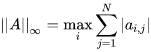

```
# 求行和范数
norm(a,inf)=max(sum(abs(a),2)）                               

norm(a,inf)

ans =

24

# 验证
sum(abs(a),2)

ans =

    6

   15

   24
```

- F-范数：Frobenius范数，即矩阵元素绝对值的平方和再开平方
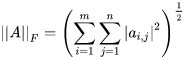 

```
# 求Frobenius范数
norm(a,'fro')=sqrt(sum(sum(abs(a).^2)))

norm(a,'fro')

ans =

  16.8819

# 验证
>> sum(sum(abs(a).^2))

ans =

  285

>> sqrt(ans)

ans =

  16.8819
```
  
- 核范数：A的奇异值之和。
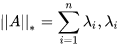



## 2. 空间距离
---

### **1.曼哈顿距离**（Manhattan distance/出租车距离 -> 对应**L1范数**）

曼哈顿距离对应L1-范数，也就是在欧几里得空间的固定直角坐标系上两点所形成的线段对轴产生的投影的距离总和。例如在平面上，坐标（x1, y1）的点P1与坐标（x2, y2）的点P2的曼哈顿距离为：d=|x1-x2|+|y1-y2|，要注意的是，曼哈顿距离依赖座标系统的转度，而非系统在座标轴上的平移或映射。通俗来讲，想象你在曼哈顿要从一个十字路口开车到另外一个十字路口，驾驶距离是两点间的直线距离吗？显然不是，除非你能穿越大楼。而实际驾驶距离就是这个“曼哈顿距离”，此即曼哈顿距离名称的来源; 同时，曼哈顿距离也称为城市街区距离(City Block distance)。

>> (1)二维平面两点a(x1,y1)与b(x2,y2)间的曼哈顿距离


>> (2)两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的曼哈顿距离
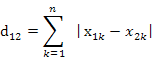


---
### **2.欧式距离**（对应**L2范数**）

欧式距离是最常见的两点之间或多点之间的距离表示法，又称之为欧几里得度量，它定义于欧几里得空间中。n维空间中两个点x1(x11,x12,…,x1n)与 x2(x21,x22,…,x2n)间的欧氏距离计算如下：
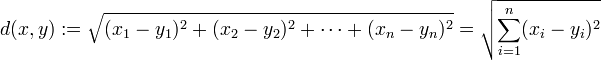

>> (1)二维平面上两点a(x1,y1)与b(x2,y2)间的欧氏距离：
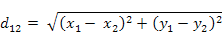

>> (2)两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的欧氏距离：
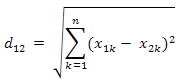

---
### **3.标准化欧氏距离** (Standardized Euclidean distance )

简单欧氏距离的缺点：就大部分统计问题而言，欧氏距离是不能令人满意的。（每个坐标对欧氏距离的贡献是同等的。当坐标表示测量值时，它们往往带有大小不等的随机波动，在这种情况下，合理的方法是对坐标加权，使变化较大的坐标比变化较小的坐标有较小的权系数，这就产生了各种距离。当各个分量为不同性质的量时，“距离”的大小与指标的单位有关。它将样品的不同属性（即各指标或各变量）之间的差别等同看待，这一点有时不能满足实际要求。没有考虑到总体变异对距离远近的影响。

标准化欧氏距离是针对简单欧氏距离的缺点而作的一种改进方案。**标准欧氏距离的思路：既然数据各维分量的分布不一样，那先将各个分量都“标准化”到均值、方差相等**。

假设样本集X的数学期望或**均值(mean)为m，标准差(standard deviation，方差开根)为s**，那么X的“标准化变量”X*表示为： **(X-m）/s**，而且标准化变量的数学期望为0，方差为1。即，样本集的标准化过程(standardization)用公式描述就是:
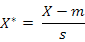

__标准化后的值 = ( 标准化前的值 － 分量的均值 ) /分量的标准差__　　

经过简单的推导就可以得到两个n维向量a(x11,x12,…,x1n)与b(x21,x22,…,x2n)间的标准化欧氏距离的公式：

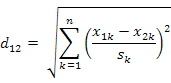

---
### **4.Mahalanobis距离**：也称作马氏距离。

马氏距离是基于**样本分布**的一种距离。物理意义就是在规范化的主成分空间中的欧氏距离。所谓规范化的主成分空间就是利用主成分分析对一些数据进行主成分分解。再对所有主成分分解轴做归一化，形成新的坐标轴。由这些坐标轴张成的空间就是规范化的主成分空间。马氏距离的优缺点：量纲无关，排除变量之间的相关性的干扰。在近邻分类法中，常采用欧式距离和马氏距离。

马氏距离定义：有M个样本向量X1~Xm， 协方差矩阵记为S， 均值记为向量μ， 则其中,样本向量X到μ的马氏距离表示为：
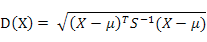

协方差矩阵中每个元素是各个矢量元素之间的协方差Cov(X,Y)，Cov(X,Y) = E{ [X-E(X)] [Y-E(Y)]}，其中E为数学期望, 而其中向量Xi与Xj之间的马氏距离定义为：
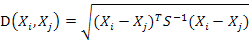

若协方差矩阵是单位矩阵（各个样本向量之间独立同分布）,则公式就成了：
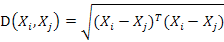

若协方差矩阵是对角矩阵，公式变成了标准化欧氏距离。

下图有两个正态分布的总体，它们的均值分别为a和b，但方差不一样，则图中的A点离哪个总体更近？ 或者说A有更大的概率属于谁？显然，A离左边的更近，A属于左边总体的概率更大， 尽管A与a的欧式距离远一些。 这就是马氏距离的直观解释。 
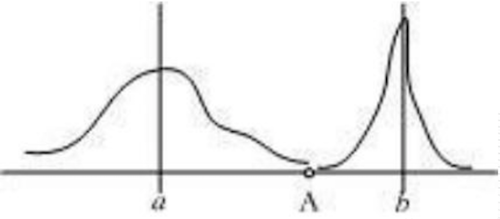

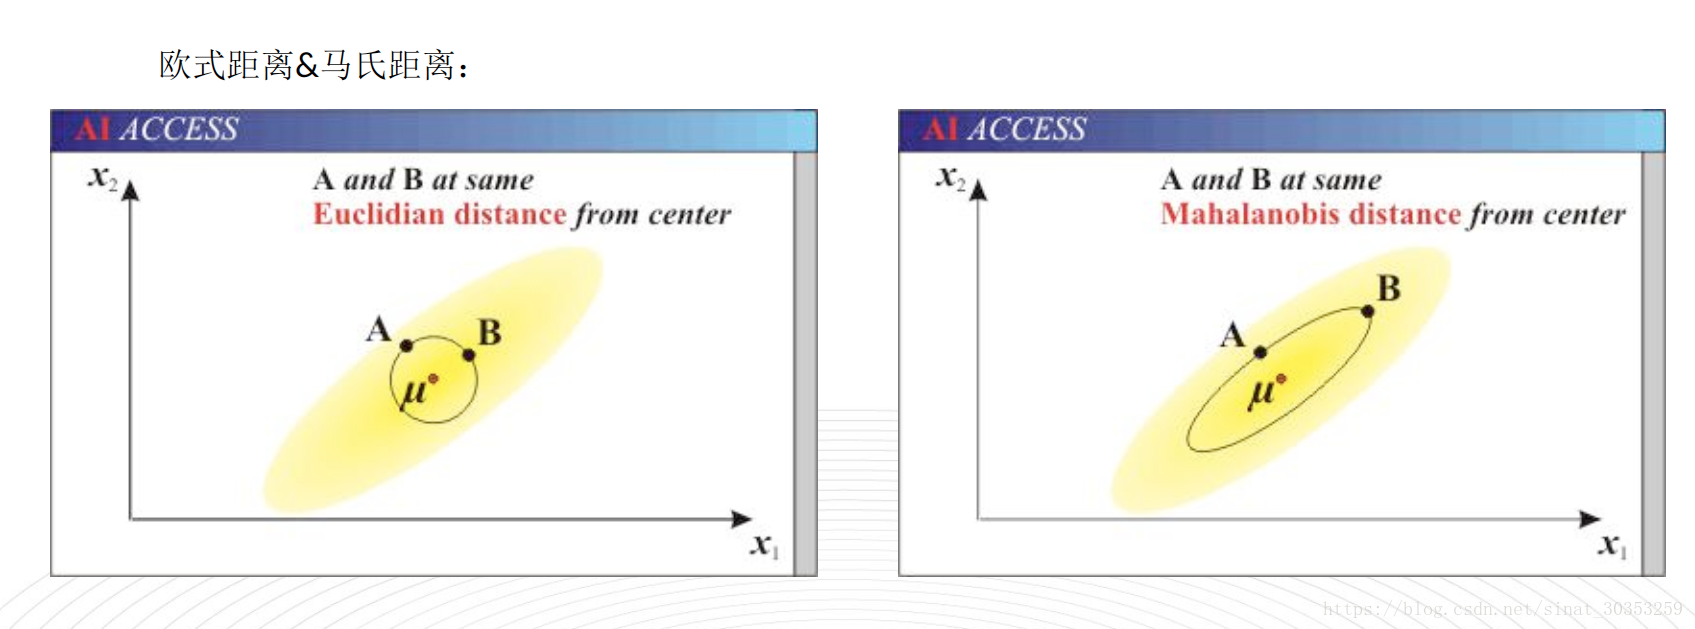




---
### **5.切比雪夫距离**（Chebyshev distance, Supremum distance: 对应**L∞范数**）

若二个向量或二个点x1和x2，其坐标分别为(x11, x12, x13, ... , x1n)和(x21, x22, x23, ... , x2n)，则二者的切比雪夫距离为：**d = max(|x1i - x2i|)，i从1到n。** 也可以表示如下：
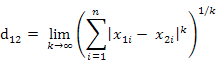

>> (1)二维平面两点a(x1,y1)与b(x2,y2)间的切比雪夫距离 


>> (2)两个n维向量a(x11,x12,…,x1n)与 b(x21,x22,…,x2n)间的切比雪夫距离 
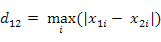

---
### **6.闵可夫斯基距离** (Minkowski Distance 也称：明式距离，对应**Lp范数**)

闵氏距离不是一种距离，而是一组距离的定义。对应Lp范数，p为参数。闵氏距离的定义：两个n维变量（或者两个n维空间点）x1(x11,x12,…,x1n)与 x2(x21,x22,…,x2n)间的闵可夫斯基距离定义为： 
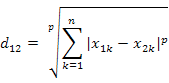

其中p是一个变参数，根据变参数的不同，闵氏距离可以表示以下一类的距离。

| p | 距离 |
|---|----- |
|p=1|曼哈顿距离|
|p=2|欧氏距离|
|p→∞|切比雪夫距离| 

---
### 7.巴氏距离（Bhattacharyya Distance）

在统计中，Bhattacharyya距离测量两个离散或连续概率分布的相似性。它与衡量两个统计样品或种群之间的重叠量的Bhattacharyya系数密切相关。Bhattacharyya距离和Bhattacharyya系数以20世纪30年代曾在印度统计研究所工作的一个统计学家A. Bhattacharya命名。同时，Bhattacharyya系数可以被用来确定两个样本被认为相对接近的，它是用来测量中的类分类的可分离性。

    - 巴氏距离的定义
    
    * 对于<离散概率分布> p和q在同一域 X，它被定义为：
 
    
    其中：
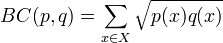

    是Bhattacharyya系数。
    
    
    * 对于<连续概率分布>，Bhattacharyya系数被定义为：
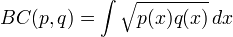
    
    在这两种情况下，巴氏距离并没有服从三角不等式.（值得一提的是，Hellinger距离不服从三角不等式）。

    
    * 对于<多变量的高斯分布> 
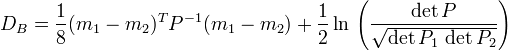

    和是手段和协方差的分布:
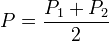
    
    需要注意的是，在这种情况下，第一项中的Bhattacharyya距离与马氏距离有关联。
    
    - Bhattacharyya系数
    
    Bhattacharyya系数是两个统计样本之间的重叠量的近似测量，可以被用于确定被考虑的两个样本的相对接近。
    计算Bhattacharyya系数涉及集成的基本形式的两个样本的重叠的时间间隔的值的两个样本被分裂成一个选定的分区数，并且在每个分区中的每个样品的成员的数量，在下面的公式中使用
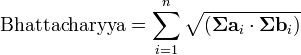

参考资料：http://en.wikipedia.org/wiki/Bhattacharyya_coefficient。
    


---
### 8.汉明距离 （信息论：字符处理）

汉明距离是以理查德·卫斯里·汉明的名字命名的。在信息论中，两个等长字符串之间的汉明距离是两个字符串对应位置的不同字符的个数。换句话说，它就是将一个字符串变换成另外一个字符串所需要替换的字符个数。例如：

|比较字符|汉明距离|
|-------|-------|
|ab 与ac 有一个字符不同|汉明距离是1|
|ab与ca有两个字符不同|汉明距离是2|
|1011101 与 1001001|汉明距离是2|
|2143896 与 2233796|汉明距离是3|
|"toned" 与 "roses"|汉明距离是3|


---
### 9.杰卡德距离(Jaccard Distance) （集合对象）

杰卡德相似系数(Jaccard similarity coefficient)： 两个集合A和B的交集元素在A， B
的并集中所占的比例，称为两个集合的杰卡德相似系数，用符号J(A,B)表示：**J(A,B)=A⋂B/A⋃B** 杰卡德相似系数是衡量两个集合的相似度一种指标。
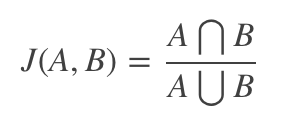
　
杰卡德距离(Jaccard Distance)：与杰卡德相似系数相反，用两个集合中不同元素占所有元素的比例来衡量两个集合的区分度：
**J(A,B)=(|A⋃B|−|A⋂B|)/|A⋃B|**
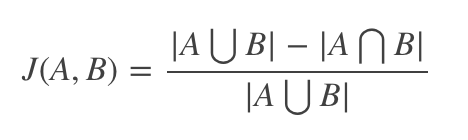

举个例子: 
```
    集合A = {a, b, c, d} 
    集合B = {c, d, e, f} 
    A∩B = {c, d} 
    A∪B = {a, b, c, d, e, f} 
    交集中有2个元素，并集中有6个元素，因此： 
    杰卡德系数为：J(A,B) = 2/6 = 1/3 
    杰卡德距离为：1 - J(A,B) = 2/3 
```

杰卡德相似系数主要用在**衡量样本的相似度**上。主要的应用场景有: 

    1.过滤相似度很高的新闻，或者网页去重 
    2.考试防作弊系统 
    3.论文查重系统 
    

---
### 10.夹角余弦(Cosine) 
几何中夹角余弦可用来衡量两个向量方向的差异，机器学习中借用这一概念来衡量样本向量之间的差异。 

>> (1)在二维空间中向量A(x1,y1)与向量B(x2,y2)的夹角余弦公式：
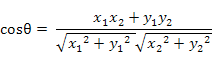

>> (2) 两个n维样本点a(x11,x12,…,x1n)和b(x21,x22,…,x2n)的夹角余弦:
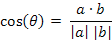
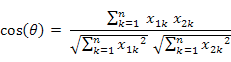

夹角余弦取值范围为[-1,1]。夹角余弦越大表示两个向量的夹角越小，夹角余弦越小表示两向量的夹角越大。
当两个向量的方向重合时夹角余弦取最大值1，这表明两个样本完全重复（通常，可用这个办法删除爬虫所收集网页中的重复网页）；
当两个向量的方向完全相反夹角余弦取最小值-1，两条样本完全不相关。
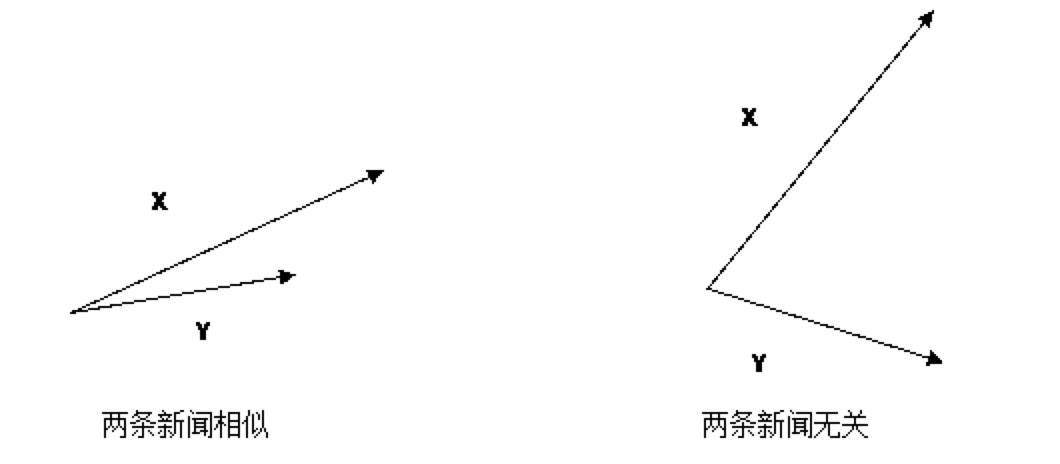

>> 余弦距离和欧氏距离的对比
从上图可以看出，余弦距离使用两个向量夹角的余弦值作为衡量两个个体间差异的大小。相比欧氏距离，余弦距离更加注重两个向量在 **方向上的差异**。
如下图，我们借助三维坐标系来看下欧氏距离和余弦距离的区别：
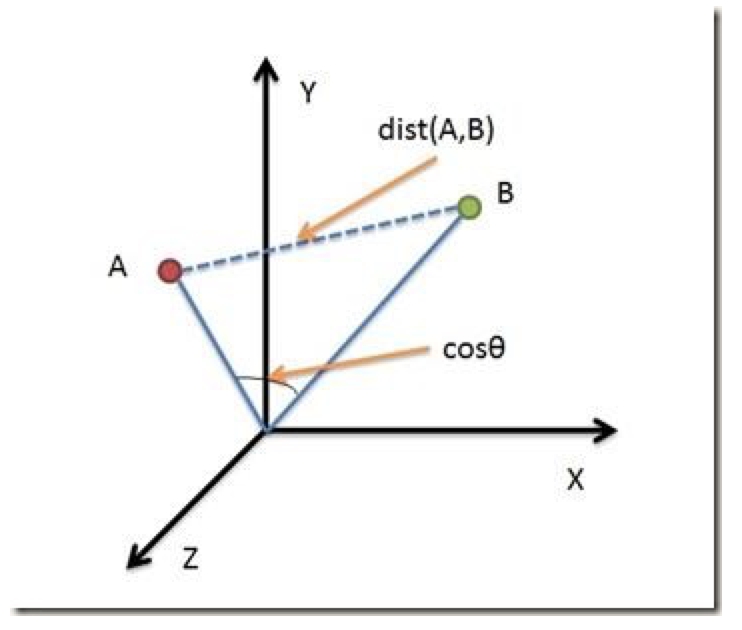

---
### 11.皮尔逊系数(Pearson Correlation Coefficient)
在具体阐述皮尔逊相关系数之前，先解释下什么是相关系数 ( Correlation coefficient )与相关距离(Correlation distance)。
  
- 相关系数 ( Correlation coefficient )的定义是：
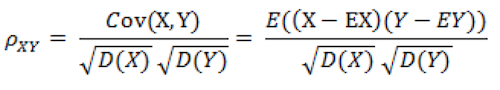
E为数学期望或均值，D为方差，D开根号为标准差，E{ [X-E(X)] [Y-E(Y)]}称为随机变量X与Y的协方差，记为Cov(X,Y)，即Cov(X,Y) = E{ [X-E(X)] [Y-E(Y)]}，而两个变量之间的协方差和标准差的商则称为随机变量X与Y的相关系数。
相关系数衡量随机变量X与Y相关程度的一种方法，相关系数的取值范围是[-1,1]。相关系数的绝对值越大，则表明X与Y相关度越高。当X与Y线性相关时，相关系数取值为1（正线性相关）或-1（负线性相关）。具体的，如果有两个变量：X、Y，最终计算出的相关系数的含义可以有如下理解：
        当相关系数为0时，X和Y两变量无关系。
        当X的值增大（减小），Y值增大（减小），两个变量为正相关，相关系数在0.00与1.00之间。
        当X的值增大（减小），Y值减小（增大），两个变量为负相关，相关系数在-1.00与0.00之间。

- 相关距离的定义
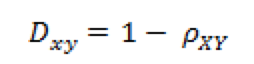
  
- 皮尔逊相关系数。
    
    在统计学中，皮尔逊积矩相关系数（英语：Pearson product-moment correlation coefficient，又称作 PPMCC或PCCs, 用r表示）用于度量两个变量X和Y之间的相关（线性相关），其值介于-1与1之间。通常情况下通过以下取值范围判断变量的相关强度：
    
|相关系数 | 相关性 |
|-------|--------|
|0.8-1.0| 极强相关 |
|0.6-0.8| 强相关 |
|0.4-0.6| 中等程度相关 |
|0.2-0.4| 弱相关 |
|0.0-0.2| 极弱相关或无相关 |

    在自然科学领域中，该系数广泛用于度量两个变量之间的相关程度。它是由卡尔·皮尔逊从弗朗西斯·高尔顿在19世纪80年代提出的一个相似却又稍有不同的想法演变而来的。这个相关系数也称作**“皮尔森相关系数r”**。
        
    1.皮尔逊系数的定义：
      两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商：
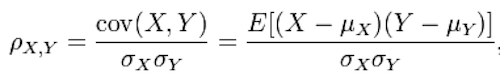
        
      以上方程定义了**总体相关系数**, 一般表示成希腊字母ρ(rho)。基于样本对协方差和方差进行估计，可以得到样本标准差, 一般表示成r：
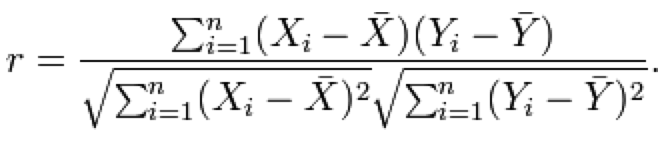

      一种等价表达式的是表示成标准分的均值。基于(Xi, Yi)的样本点，**样本皮尔逊系数**是:
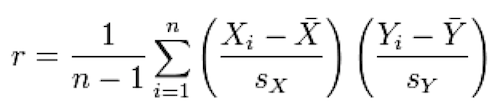
        
      其中
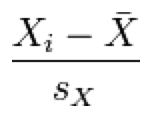
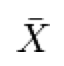
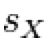
        
      分别是标准分、样本平均值和样本标准差。
        
      举个例子：假设有两个变量X、Y，那么两变量间的皮尔逊相关系数可通过以下公式计算：
        
   - 公式一：
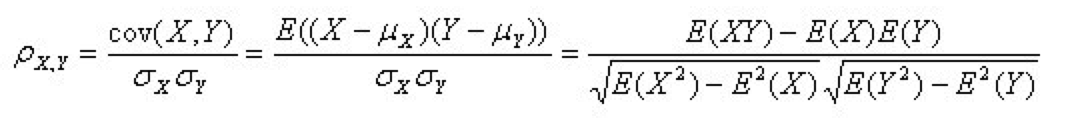
     
   - 公式二：
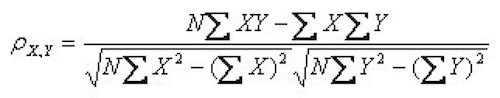

   - 公式三：
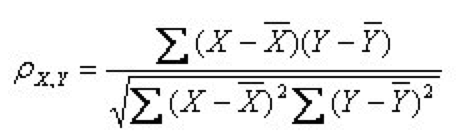

   - 公式四：
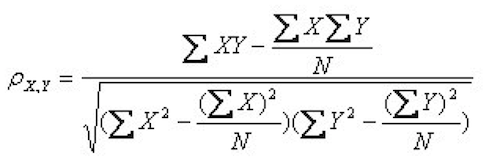

        以上列出的四个公式等价，其中E是数学期望，cov表示协方差，N表示变量取值的个数。

    2.皮尔逊相关系数的适用范围:
      当两个变量的标准差都不为零时，相关系数才有定义，皮尔逊相关系数适用于：
          两个变量之间是线性关系，都是连续数据。
          两个变量的总体是正态分布，或接近正态的单峰分布。
          两个变量的观测值是成对的，每对观测值之间相互独立。
       
    3.如何理解皮尔逊相关系数
      rubyist：皮尔逊相关系数理解有两个角度
    其一, 按照高中数学水平来理解, 它很简单, 可以看做将两组数据首先做Z分数处理之后, 然后两组数据的乘积和除以样本数，Z分数一般代表正态分布中, 数据偏离中心点的距离.等于变量减掉平均数再除以标准差.(就是高考的标准分类似的处理)
    样本标准差则等于变量减掉平均数的平方和，再除以样本数，最后再开方，也就是说，方差开方即为标准差，样本标准差计算公式为：
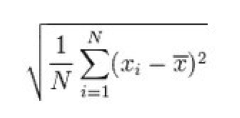
    
    所以, 根据这个最朴素的理解,我们可以将公式依次精简为:
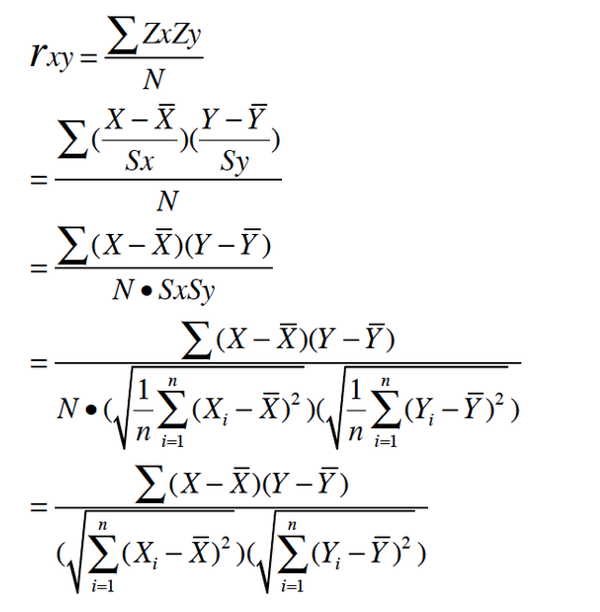
    
    其二, 按照大学的线性数学水平来理解, 它比较复杂一点,可以看做是两组数据的向量夹角的余弦。下面是关于此皮尔逊系数的几何学的解释，先来看一幅图，如下所示：
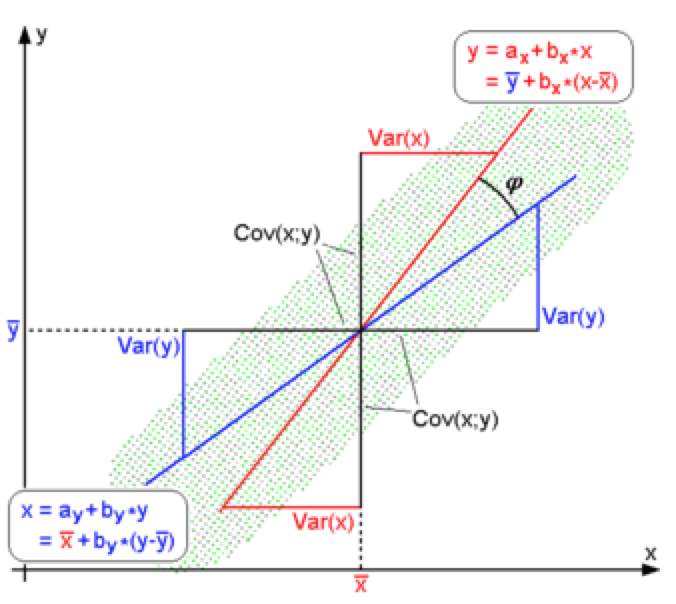
    
    回归直线： y=gx(x) [红色] 和 x=gy(y) [蓝色]

    如上图，对于没有中心化的数据, 相关系数与两条可能的回归线y=gx(x) 和 x=gy(y) 夹角的余弦值一致。
    对于没有中心化的数据 (也就是说, 数据移动一个样本平均值以使其均值为0), 相关系数也可以被视作由两个随机变量 向量 夹角 的余弦值（见下方）。
      
    4.皮尔逊相关的约束条件
      从以上解释, 也可以理解皮尔逊相关的约束条件:
        1 两个变量间有线性关系
        2 变量是连续变量
        3 变量均符合正态分布,且二元分布也符合正态分布
        4 两变量独立
  
- 使用维基中的例子来说明如何计算皮尔逊系数:

```
例如，假设五个国家的国民生产总值分别是1、2、3、5、8（单位10亿美元），又假设这五个国家的贫困比例分别是11%、12%、13%、15%、18%。求国民生产总值和国家贫苦比例这两个维度之间的皮尔逊系数。 按照维基的例子,应计算出相关系数为1出来.我们看看如何一步一步计算出来的.

1. 创建2个向量.(R语言)

x<-c(1,2,3,5,8)

y<-c(0.11,0.12,0.13,0.15,0.18)

2. 计算分子
x的平均数是:3.8  
y的平均数是0.138 
sum((x-mean(x))*(y-mean(y)))=0.308

用大白话来写就是:

(1-3.8)*(0.11-0.138)=0.0784
(2-3.8)*(0.12-0.138)=0.0324
(3-3.8)*(0.13-0.138)=0.0064
(5-3.8)*(0.15-0.138)=0.0144
(8-3.8)*(0.18-0.138)=0.1764

0.0784+0.0324+0.0064+0.0144+0.1764=0.308

3. 计算分母
sum((x-mean(x))^2)=30.8
sum((y-mean(y))^2)= 0.00308

用大白话来写,分别是:

(1-3.8)^2=7.84 #平方
(2-3.8)^2=3.24 #平方
(3-3.8)^2=0.64 #平方
(5-3.8)^2=1.44 #平方
(8-3.8)^2=17.64 #平方

7.84+3.24+0.64+1.44+17.64=30.8

同理,求得:

sum((y-mean(y))^2)= 0.00308

然后再开平方根,分别是:

30.8^0.5=5.549775
0.00308^0.5=0.05549775

4. 计算皮尔逊系数

用分子除以分母,就计算出最终结果:

0.308/(5.549775*0.05549775)=1
```


---
### 12. 信息熵(Information Entropy)

信息熵是衡量分布的混乱程度或分散程度的一种度量。分布越分散(或者说分布越平均)，信息熵就越大。分布越有序（或者说分布越集中），信息熵就越小。

计算给定的样本集X的信息熵的公式：
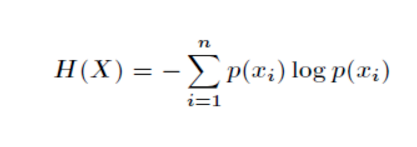

参数的含义：
    
    n：样本集X的分类数

    p(xi)：X中第i类元素出现的概率
    
信息熵越大表明样本集S分类越分散，信息熵越小则表明样本集X分类越集中。。当S中n个分类出现的概率一样大时（都是1/n），信息熵取最大值log2(n)。当X只有一个分类时，信息熵取最小值0

---
### 13. spearman correlation coefficient（斯皮尔曼相关性系数）

斯皮尔曼相关性系数，通常也叫斯皮尔曼秩相关系数。“秩”，可以理解成就是一种顺序或者排序，那么它就是根据原始数据的排序位置进行求解，这种表征形式就没有了求皮尔森相关性系数时那些限制。下面来看一下它的计算公式：
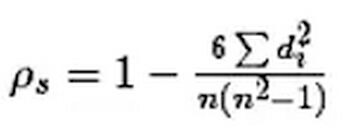

计算过程就是：首先对两个变量（X, Y）的数据进行排序，然后记下排序以后的位置（X’, Y’），（X’, Y’）的值就称为秩次，秩次的差值就是上面公式中的di，n就是变量中数据的个数，最后带入公式就可求解结果。举个例子吧，假设我们实验的数据如下：
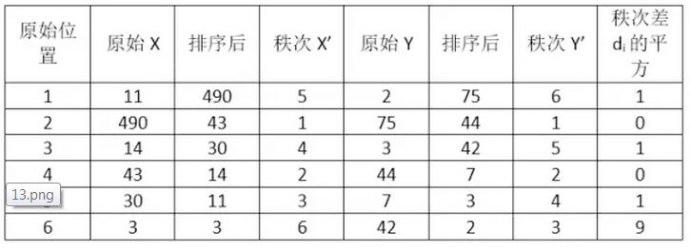

带入公式，求得斯皮尔曼相关性系数：
```
ρs= 1-6*(1+1+1+9)/6*35=0.657
```
也就是说，我们不用管X和Y这两个变量具体的值到底差了多少，只需要算一下它们每个值所处的排列位置的差值，就可以求出相关性系数了。而且，即便在变量值没有变化的情况下，也不会出现像皮尔森系数那样分母为0而无法计算的情况。另外，即使出现异常值，由于异常值的秩次通常不会有明显的变化（比如过大或者过小，那要么排第一，要么排最后），所以对斯皮尔曼相关性系数的影响也非常小！

由于斯皮尔曼相关性系数没有那些数据条件要求，适用的范围就广多了。在我们生物实验数据分析中，尤其是在分析多组学交叉的数据中说明不同组学数据之间的相关性时，使用的频率很高。

---
### 14. kendall correlation coefficient（肯德尔相关性系数）

肯德尔相关性系数，又称肯德尔秩相关系数，它也是一种秩相关系数，不过它所计算的对象是分类变量。
分类变量可以理解成有类别的变量，可以分为
无序的，比如性别（男、女）、血型（A、B、O、AB）；
有序的，比如肥胖等级（重度肥胖，中度肥胖、轻度肥胖、不肥胖）。
通常需要求相关性系数的都是有序分类变量。

举个例子。比如评委对选手的评分（优、中、差等），我们想看两个（或者多个）评委对几位选手的评价标准是否一致；或者医院的尿糖化验报告，想检验各个医院对尿糖的化验结果是否一致，这时候就可以使用肯德尔相关性系数进行衡量。

```
R语言实现：
还是用cor函数求，这时候把method这个参数设成“kendall”，这时我们假设老师对选手的评价等级---3表示优，2表示中，1表示差：

1 //赋予a,b向量值
2 a<-c(1,2,3)
3 b<-c(1,3,2)
4 
5 //计算kendall相关系数
6 cor.test(a,b,method="kendall")
7 tau=0.3333333333

这时候就可以理解为两位老师对选手们的看法是呈相同趋势的，不过这种相同的程度不很大。
```

在统计学中，肯德尔相关系数是以Maurice Kendall命名的，并经常用希腊字母τ（tau）表示其值。肯德尔相关系数是一个用来测量两个随机变量相关性的统计值。一个肯德尔检验是一个无参数假设检验，它使用计算而得的相关系数去检验两个随机变量的统计依赖性。肯德尔相关系数的取值范围在-1到1之间，当τ为1时，表示两个随机变量拥有一致的等级相关性；当τ为-1时，表示两个随机变量拥有完全相反的等级相关性；当τ为0时，表示两个随机变量是相互独立的。

举个例子： 
    假设两个随机变量分别为X、Y（也可以看做两个集合），它们的元素个数均为N，两个随即变量取的第i（1<=i<=N）个值分别用Xi、Yi表示。X与Y中的对应元素组成一个元素对集合XY，其包含的元素为(Xi, Yi)（1<=i<=N）。

- 当出现情况1或2时；这两个元素就被认为是一致的
```
情况1：Xi>Xj且Yi>Yj
情况2：Xi<Xj且Yi<Yj
``` 
- 当出现情况3或4时；这两个元素被认为是不一致的
```
情况3：Xi>Xj且Yi<Yj
情况4：Xi<Xj且Yi>Yj
```    
- 当出现情况5或6时；这两个元素既不是一致的也不是不一致的
```
情况5：Xi=Xj      
情况6：Yi=Yj     
```

这里有三个公式计算肯德尔相关系数的值:

- **公式一**：
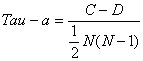

其中C表示XY中拥有一致性的元素对数（两个元素为一对）；D表示XY中拥有不一致性的元素对数。

注意：这一公式仅适用于集合X与Y中均不存在相同元素的情况（集合中各个元素唯一）。

- **公式二**：
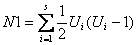

注意：这一公式适用于集合X或Y中存在相同元素的情况（当然，如果X或Y中均不存在相同的元素时，公式二便等同于公式一）。

其中C、D与公式一中相同；
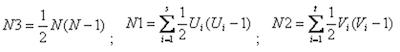

N1、N2分别是针对集合X、Y计算的，现在以计算N1为例，给出N1的由来（N2的计算可以类推）：

将X中的相同元素分别组合成小集合，s表示集合X中拥有的小集合数（例如X包含元素：1 2 3 4 3 3 2，那么这里得到的s则为2，因为只有2、3有相同元素），Ui表示第i个小集合所包含的元素数。N2在集合Y的基础上计算而得。

- **公式三**：
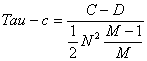

注意：这一公式中没有再考虑集合X、或Y中存在相同元素给最后的统计值带来的影响。公式三的这一计算形式仅适用于用表格表示的随机变量X、Y之间相关系数的计算（下面将会介绍）。

参数M稍后会做介绍。

 
以上都是围绕用集合表示的随机变量而计算肯德尔相关系数的，下面所讲的则是围绕用表格表示的随机变量而计算肯德尔相关系数的。

通常人们会将两个随机变量的取值制作成一个表格，例如有10个样本，对每个样本进行两项指标测试X、Y（指标X、Y的取值均为1到3）。根据样本的X、Y指标取值，得到以下二维表格（表1）：
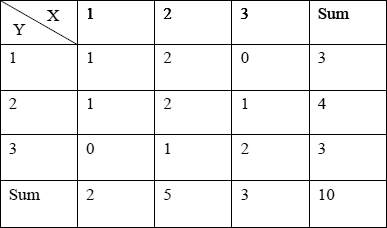

由表1可以得到X及Y的可以以集合的形式表示为：

X={1, 1, 2, 2, 2, 2, 2, 3, 3, 3}；

Y={1, 2, 1, 1, 2, 2, 3, 2, 3, 3}；

得到X、Y的集合形式后就可以使用以上的公式一或公式二计算X、Y的肯德尔相关系数了（注意公式一、二的适用条件）。

当然如果给定X、Y的集合形式，那么也是很容易得到它们的表格形式的。


这里需要注意的是：公式二也可以用来计算表格形式表示的二维变量的肯德尔相关系数，不过它一般用来计算由正方形表格表示的二维变量的肯德尔相关系数，公式三则只是用来计算由长方形表格表示的二维变量的Kendall相关系数。这里给出公式三中字母M的含义，M表示长方形表格中行数与列数中较小的一个。表1的行数及列数均为三。




### 空间距离总结

在实践统计中,一般只输出两个系数,一个是相关系数,也就是计算出来的相关系数大小,在-1到1之间;另一个是独立样本检验系数,用来检验样本一致性。
简单说来，各种“距离”的应用场景简单概括为，
- 空间：欧氏距离，
- 路径：曼哈顿距离，国际象棋国王：切比雪夫距离，以上三种的统一形式:闵可夫斯基距离，
- 加权：标准化欧氏距离，
- 排除量纲和依存：马氏距离，
- 向量差距：夹角余弦，
- 编码差别：汉明距离，
- 集合近似度：杰卡德类似系数与距离，
- 相关：相关系数与相关距离

## Use dataframe to correlation coefficient
---

In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {'A':np.random.randint(1, 100, 10),
     'B':np.random.randint(1, 100, 10),
     'C':np.random.randint(1, 100, 10)})
df

,A,B,C
0,52,57,50
1,19,95,88
2,65,16,41
3,16,12,60
4,62,84,67
5,33,55,84
6,68,14,85
7,6,14,88
8,71,71,26
9,85,33,22


In [2]:
# pearson相关系数
df.corr() 

,A,B,C
A,1.000000,0.05101,-0.687943
B,0.051010,1.00000,0.037550
C,-0.687943,0.03755,1.000000


In [3]:
# Kendall Tau相关系数
df.corr('kendall')

,A,B,C
A,1.000000,0.089893,-0.584307
B,0.089893,1.000000,-0.022727
C,-0.584307,-0.022727,1.000000


In [4]:
# spearman秩相关
df.corr('spearman') 

,A,B,C
A,1.000000,0.182372,-0.699091
B,0.182372,1.000000,-0.021341
C,-0.699091,-0.021341,1.000000


In [5]:
import pandas as pd
import numpy as np
 
#原始数据
X1=pd.Series([1, 2, 3, 4, 5, 6])
Y1=pd.Series([0.3, 0.9, 2.7, 2, 3.5, 5])
 
print("X1.mean:{}".format(X1.mean())) #平均值# 3.5
print("Y1.mean:{}".format(Y1.mean())) #2.4
print("X1.var:{}".format(X1.var()))   #方差#3.5
print("Y1.var:{}".format(Y1.var()))   #2.9760000000000004
 
print("X1.std:{}".format(X1.std()))   #标准差不能为0  # 1.8708286933869707
print("Y1.std:{}".format(Y1.std()))   #标准差不能为0  # 1.725108692227826
print("Y1.cor:{}".format(X1.cov(Y1))) #协方差        #3.0600000000000005
 
print("X1.corr, pearson:{}".format(X1.corr(Y1,method="pearson")))                #皮尔森相关性系数   # 0.9481366640102855
print("X1.corr, pearson with formula:{}".format(X1.cov(Y1)/(X1.std()*Y1.std()))) #皮尔森相关性系数   # 0.9481366640102856
print("X1.corr, spearman:{}".format(X1.corr(Y1,method='spearman')))              #斯皮尔曼相关性系数 # 0.942857142857143
print("X1.corr, kendall:{}".format(X1.corr(Y1,method='kendall')))                #肯德尔相关性系数   # 0.8666666666666666

X1.mean:3.5
Y1.mean:2.4
X1.var:3.5
Y1.var:2.9760000000000004
X1.std:1.8708286933869707
Y1.std:1.725108692227826
Y1.cor:3.06
X1.corr, pearson:0.9481366640102854
X1.corr, pearson with formula:0.9481366640102854
X1.corr, spearman:0.942857142857143
X1.corr, kendall:0.8666666666666666
